<a href="https://colab.research.google.com/github/ahlem-Ing/ahlem-Ing/blob/main/Domain_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing


In [ ]:
!pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.1/990.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 18.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-many

In [ ]:
import stanza

stanza.download("en")  # download English model for sentence splitting

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Downloaded file to /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


### download the bbc data

In [ ]:
!wget http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
!unzip bbc-fulltext.zip
!rm bbc-fulltext.zip

--2024-05-13 09:45:58--  http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
Resolving mlg.ucd.ie (mlg.ucd.ie)... 137.43.93.132
Connecting to mlg.ucd.ie (mlg.ucd.ie)|137.43.93.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874079 (2.7M) [application/zip]
Saving to: ‘bbc-fulltext.zip’

bbc-fulltext.zip    100%[===================>]   2.74M  3.73MB/s    in 0.7s    

2024-05-13 09:45:59 (3.73 MB/s) - ‘bbc-fulltext.zip’ saved [2874079/2874079]

Archive:  bbc-fulltext.zip
   creating: bbc/
   creating: bbc/entertainment/
  inflating: bbc/entertainment/289.txt  
  inflating: bbc/entertainment/262.txt  
  inflating: bbc/entertainment/276.txt  
  inflating: bbc/entertainment/060.txt  
  inflating: bbc/entertainment/074.txt  
  inflating: bbc/entertainment/048.txt  
  inflating: bbc/entertainment/114.txt  
  inflating: bbc/entertainment/100.txt  
  inflating: bbc/entertainment/128.txt  
  inflating: bbc/entertainment/316.txt  
  inflating: bbc/entertainment/302.txt 

In [ ]:
import os

def display_directory_structure(directory):
    print(f"{directory}/")
    with os.scandir(directory) as entries:
        for entry in entries:
            if entry.is_dir():
                print(f"  {entry.name}/")
                with os.scandir(entry.path) as sub_entries:
                    for sub_entry in sub_entries:
                        if sub_entry.is_file():
                            pass
            elif entry.is_file():
                pass

# Replace 'path_to_your_folder' with the path to the directory you want to view
directory_path = 'bbc'

display_directory_structure(directory_path)


bbc/
  tech/
  business/
  sport/
  entertainment/
  politics/


In [ ]:
#delete the Tech and
!rm -r bbc/sport bbc/tech


In [ ]:
# merge all domain into one  folder 'other'
import os

# Define the paths for the old and new hierarchies
old_hierarchy_path = "bbc"
new_hierarchy_path = "bbc/other"

# Create the new hierarchy if it doesn't exist
if not os.path.exists(new_hierarchy_path):
    os.makedirs(new_hierarchy_path)

# Counter for renaming the files
file_counter = 1

# Iterate through the old hierarchy
for root, dirs, files in os.walk(old_hierarchy_path):
    for filename in files:
        # Get the full path of the file in the old hierarchy
        old_file_path = os.path.join(root, filename)
        # Generate the new filename based on the counter
        new_filename = f"{file_counter}.txt"
        # Move the file to the new hierarchy with the new filename
        new_file_path = os.path.join(new_hierarchy_path, new_filename)
        os.rename(old_file_path, new_file_path)
        # Increment the counter for the next file
        file_counter += 1

print("Files have been rearranged successfully.")


Files have been rearranged successfully.


In [ ]:
import os

# Define the path to the "bbc" directory
bbc_directory = "bbc"

# Iterate through the directories in the "bbc" directory
for dir_name in os.listdir(bbc_directory):
    # Construct the full path of the directory
    dir_path = os.path.join(bbc_directory, dir_name)
    # Check if the item is a directory and its name is not "other"
    if os.path.isdir(dir_path) and dir_name != "other":
        # Remove the directory and all its contents recursively
        os.system(f"rm -rf {dir_path}")

print("Other folders have been deleted successfully.")


Other folders have been deleted successfully.


### web scraping For Transport Sentences

In [ ]:
# Install necessary packages
!pip install selenium
!apt update
!apt install chromium-chromedriver


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.co

In [ ]:
# web scrapping

# Import Libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
import os

#Configure Chrome Options
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
dr = webdriver.Chrome(options=options)

sentences=[]

# Import the website for Scraping
dr.get("https://transloc.com/blog/the-definitive-transit-terms-glossary/") # Website used for scraping
c=1
for i in dr.find_elements(By.TAG_NAME, 'p'):
  sentences.append(i.text)
  c += 1
dr.get("https://promova.com/english-vocabulary/transportation-vocabulary") # Website used for scraping
section = dr.find_element(By.CLASS_NAME, 'content_block_content__SI6Sd')
paragraphs = section.find_elements(By.TAG_NAME, "p")
for index, paragraph in enumerate(paragraphs):
    sentences.append(paragraph.text)
items = section.find_elements(By.TAG_NAME, "li")
for index, item in enumerate(items):
    sentences.append(item.text)
dr.get("https://www.ieltsjacky.com/transportation-vocabulary.html") # Website used for scraping
boxes = dr.find_elements(By.CSS_SELECTOR, "div[style='border-color: #bababa; border-width: 1px 1px 1px 1px; border-style: solid; background-color: #f5faf5; box-sizing: border-box']")
c=1
for index, box in enumerate(boxes):
    paragraphs = box.find_elements(By.TAG_NAME, "p")
    for paragraph_index, paragraph in enumerate(paragraphs):
        words = paragraph.text.split()
        if len(words) >3:
            sentences.append(paragraph.text)
            c+=1
dr.get("https://langeek.co/en/vocab/subcategory/153/word-list") # Website used for scraping
boxes = dr.find_elements(By.CSS_SELECTOR, "div[class='tw-p-4 lg:tw-p-6 tw-shadow-2 tw-rounded-3xl tw-flex tw-flex-col tw-justify-between']")
c=1
for index, box in enumerate(boxes):
    sentences.append(box.text)
dr.get("https://langeek.co/en/vocab/subcategory/958/word-list") # Website used for scraping
boxes = dr.find_elements(By.CSS_SELECTOR, "div[class='tw-p-4 lg:tw-p-6 tw-shadow-2 tw-rounded-3xl tw-flex tw-flex-col tw-justify-between']")
c=1
for index, box in enumerate(boxes):
    sentences.append(box.text)
dr.get("https://www.montgomerycountymd.gov/DOT-Parking/Parking-Info/Glossary.html") # Website used for scraping
section = dr.find_element(By.CSS_SELECTOR, "section[class='margin-bottom']")
par = section.find_elements(By.TAG_NAME, "p")
c=1
for index, paragraph in enumerate(par):
    sentences.append(paragraph.text)
dr.get("https://kids.britannica.com/students/article/transportation/277414") # Website used for scraping
article = dr.find_element(By.TAG_NAME, "article")
par = article.find_elements(By.TAG_NAME, "p")
for index, paragraph in enumerate(par):
    sentences.append(paragraph.text)



# Create the folder if it doesn't exist
folder_name = "bbc/transport"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Iterate over each item in the sentences list
for i, item in enumerate(sentences):
    # Generate the filename based on the index
    filename = os.path.join(folder_name, f"{i}.txt")
    # Open a new text file in write mode
    with open(filename, "w", encoding="utf-8") as file:
        # Write the item's text to the file
        file.write(item)

# Print a message indicating that the files have been created
print("Text files have been created in the 'transport' folder.")

Text files have been created in the 'transport' folder.


###  Dataset Generation

In [ ]:
import glob


def create_dataset():
    """
    Create a labeled data set from the sentence-level data.

    Note that this function will not work with a different folder structure,
    because it relies on extracting the labels based on the name of the directory
    each sentences file is contained in.
    """

    sentences = list()
    labels = list()
    # hard coding the filepath for the sake of simplicity
    for filename in glob.glob("bbc/*/*.sents"):
        sents = read_file(filename)
        for sent in sents:
            sentences.append(sent)
            # extracting labels based on directory name
            # if using a different data set or folder structure this lines needs to be changed appropriately
            labels.append(filename.split("/")[-2])

    return sentences, labels


def read_file(filename):
    """ Read a text file line by line and remove empty lines. """

    with open(filename, "r") as infile:
        contents = infile.readlines()
        contents = [line for line in [line.strip() for line in contents] if not len(line) == 0]

    return contents


def write_lines_to_file(outfilename, lines):
    """ Write lines in a list to a text file. """

    with open(outfilename, "w") as outfile:
        for line in lines:
            outfile.write(line)
            outfile.write("\n")

    pass

In [ ]:
'''
Data Preprocessing
'''
import glob
import stanza
import sys
#from utils import read_file, write_lines_to_file


def main(filename, nlp, outfilename):

    # read data
    lines = read_file(filename)

    sentences = list()

    # split lines into sentences
    for line in lines:
        doc = nlp(line)
        sents = [sent.text for sent in doc.sentences]
        for sent in sents:
            sentences.append(sent)

    # save results to file
    write_lines_to_file(outfilename, sentences)

    pass


# create Stanza pipeline using the default model package
nlp = stanza.Pipeline("en", processors="tokenize")


for filename in glob.glob("bbc/*/*.txt"):
        # some files will give UnicodeDecodeError - we can skip them this way
   try:
     print(filename)
     outfile = filename.replace(".txt", ".sents")
     main(filename, nlp, outfile)
   except:
      print(filename, "COULD NOT BE PROCESSED")
      pass

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Done loading processors!


bbc/other/1736.txt
bbc/other/779.txt
bbc/other/1495.txt
bbc/other/1792.txt
bbc/other/1759.txt
bbc/other/1679.txt
bbc/other/1770.txt
bbc/other/868.txt
bbc/other/1511.txt
bbc/other/826.txt
bbc/other/1008.txt
bbc/other/1590.txt
bbc/other/1026.txt
bbc/other/539.txt
bbc/other/1340.txt
bbc/other/841.txt
bbc/other/1594.txt
bbc/other/1727.txt
bbc/other/1763.txt
bbc/other/572.txt
bbc/other/568.txt
bbc/other/810.txt
bbc/other/1704.txt
bbc/other/1353.txt
bbc/other/973.txt
bbc/other/1592.txt
bbc/other/1090.txt
bbc/other/962.txt
bbc/other/1378.txt
bbc/other/1183.txt
bbc/other/1174.txt
bbc/other/806.txt
bbc/other/800.txt
bbc/other/1040.txt
bbc/other/1320.txt
bbc/other/1270.txt
bbc/other/976.txt
bbc/other/1194.txt
bbc/other/1611.txt
bbc/other/827.txt
bbc/other/725.txt
bbc/other/1143.txt
bbc/other/1371.txt
bbc/other/662.txt
bbc/other/1032.txt
bbc/other/1169.txt
bbc/other/1355.txt
bbc/other/1586.txt
bbc/other/989.txt
bbc/other/1126.txt
bbc/other/754.txt
bbc/other/822.txt
bbc/other/1749.txt
bbc/other/98

### Train the Model

In [ ]:
import numpy as np
import tensorflow_hub as hub
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical


# create a labeled data set from sentence-level data
X, y = create_dataset()

# convert string labels to a categorical representation
le = LabelEncoder()
y = to_categorical(le.fit_transform(y))
# split data set into TRAIN, DEV, and TEST sets
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% for DEV and TEST
# split DEV further into DEV and TEST
X_dev, X_test, y_dev, y_test = train_test_split(X_dev, y_dev, test_size=0.5, random_state=42)



In [ ]:
print(X[2618])
print(y[2618])


"With the figures apparently the worst we've seen in the post-war period, these numbers are very charged politically," said Christian Jasperneite, an economist with MM Warburg.
[1. 0.]


In [ ]:

# load embeddings model from Tensorflow Hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# convert sentences to embeddings
X_train = embed(X_train)
X_dev = embed(X_dev)
X_test = embed(X_test)



In [ ]:
# Check the shape of the embeddings
print("Shape of X_train_embeddings:", X_train.shape)
print("Shape of X_dev_embeddings:", X_dev.shape)
print("Shape of X_test_embeddings:", X_test.shape)

Shape of X_train_embeddings: (20870, 512)
Shape of X_dev_embeddings: (2609, 512)
Shape of X_test_embeddings: (2609, 512)


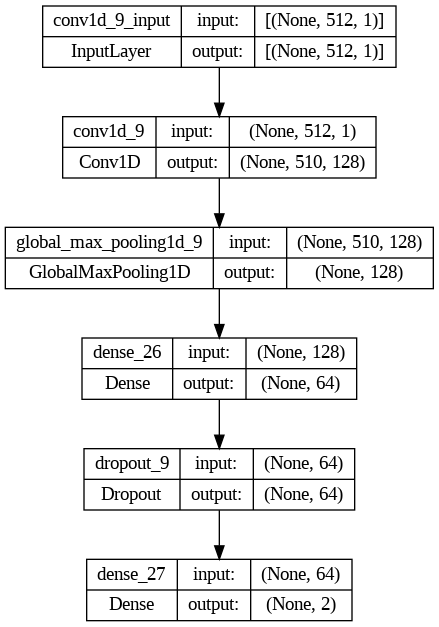

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.utils import plot_model

# Define the CNN model
model = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(512, 1)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2,  activation="softmax")
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:

X_train_reshaped = tf.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_dev_reshaped = tf.reshape(X_dev, (X_dev.shape[0], X_dev.shape[1], 1))
X_test_reshaped = tf.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Train the model
history = model.fit(X_train_reshaped, y_train, validation_data=(X_dev_reshaped, y_dev), epochs=10, batch_size=32)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_reshaped, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
653/653 [==============================] - 18s 26ms/step - loss: 0.2490 - accuracy: 0.9395 - val_loss: 0.2178 - val_accuracy: 0.9437
Epoch 2/10
653/653 [==============================] - 14s 21ms/step - loss: 0.2369 - accuracy: 0.9398 - val_loss: 0.2174 - val_accuracy: 0.9437
Epoch 3/10
653/653 [==============================] - 15s 23ms/step - loss: 0.2335 - accuracy: 0.9398 - val_loss: 0.2164 - val_accuracy: 0.9437
Epoch 4/10
653/653 [==============================] - 14s 21ms/step - loss: 0.2335 - accuracy: 0.9398 - val_loss: 0.2172 - val_accuracy: 0.9437
Epoch 5/10
653/653 [==============================] - 14s 21ms/step - loss: 0.2323 - accuracy: 0.9398 - val_loss: 0.2157 - val_accuracy: 0.9437
Epoch 6/10
653/653 [==============================] - 14s 21ms/step - loss: 0.2305 - accuracy: 0.9398 - val_loss: 0.2158 - val_accuracy: 0.9437
Epoch 7/10
653/653 [==============================] - 14s 21ms/step - loss: 0.2305 - accuracy: 0.9398 - val_loss: 0.2176 - val_accuracy:

In [ ]:
# Get predictions from the model using X_test
predictions = model.predict(X_test_reshaped)
# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
_y_test = le.inverse_transform([np.argmax(y) for y in y_test])  # reconstruct original string labels
predictions = le.inverse_transform(predicted_labels)
report = classification_report(_y_test, predictions)
print(report)

82/82 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

       other       0.95      1.00      0.97      2470
   transport       0.00      0.00      0.00       139

    accuracy                           0.95      2609
   macro avg       0.47      0.50      0.49      2609
weighted avg       0.90      0.95      0.92      2609



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
653/653 [==============================] - 8s 7ms/step - loss: 0.0784 - accuracy: 0.9755 - val_loss: 0.0348 - val_accuracy: 0.9858
Epoch 2/10
653/653 [==============================] - 3s 4ms/step - loss: 0.0248 - accuracy: 0.9909 - val_loss: 0.0353 - val_accuracy: 0.9866
Epoch 3/10
653/653 [==============================] - 2s 4ms/step - loss: 0.0191 - accuracy: 0.9935 - val_loss: 0.0356 - val_accuracy: 0.9881
Epoch 4/10
653/653 [==============================] - 3s 4ms/step - loss: 0.0133 - accuracy: 0.9954 - val_loss: 0.0442 - val_accuracy: 0.9866
Epoch 5/10
653/653 [==============================] - 2s 3ms/step - loss: 0.0077 - accuracy: 0.9981 - val_loss: 0.0426 - val_accuracy: 0.9889
Epoch 6/10
653/653 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0571 - val_accuracy: 0.9881
Epoch 7/10
653/653 [==============================] - 2s 3ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 0.0638 - val_accuracy: 0.9877
Epoch 

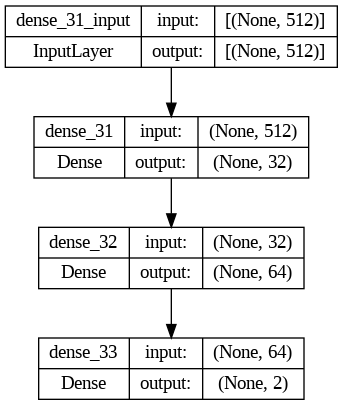

In [ ]:

# build Sequential model with 3 layers
model = Sequential()
model.add(Dense(units=32, activation="relu"))  # input layer
model.add(Dense(units=64, activation="relu"))  # hidden layer
model.add(Dense(units=2, activation="softmax"))  # output layer, no. of units equals no. of classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit (train) the model
model.fit(x=X_train, y=y_train,
              epochs=10,
              validation_data=(X_dev, y_dev),
              batch_size=32,
              verbose=1)
plot_model(model, to_file='Fnn_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:



# evaluate the model
predictions = np.argmax(model.predict(X_test), axis=-1)
y_test = le.inverse_transform([np.argmax(y) for y in y_test])  # reconstruct original string labels
predictions = le.inverse_transform(predictions)
report = classification_report(y_test, predictions)
print(report)


82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       other       1.00      0.95      0.97      2609
   transport       0.00      0.00      0.00         0

    accuracy                           0.95      2609
   macro avg       0.50      0.47      0.49      2609
weighted avg       1.00      0.95      0.97      2609



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Convert the sentence to its embedding representation
sentence_embedding = embed(["how long could  i park my car in street"])

# Make predictions using the trained model
predictions = np.argmax(model.predict(sentence_embedding), axis=-1)

# Print the predicted label
print(predictions)

In [ ]:
model.save("Domain_classifier")

In [ ]:
import tensorflow as tf

# Load the embedding model
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Load the trained model
loaded_model = tf.keras.models.load_model("domain_classifier")

# Preprocess the sentence
sentence = "hello"
sentence_embedding = embed([sentence])

# Make predictions using the loaded model
predictions = np.argmax(loaded_model.predict(sentence_embedding))

# Print the predicted domain
print(predictions)
